In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
cohort = pd.read_csv('final_cohort_dod_cleaned.csv')

In [ ]:
print(cohort.columns)
cohort.head()
print(cohort.survival_status.value_counts()/cohort.shape[0])

Index(['age', 'bmi', 'SOFA', 'apsiii', 'charlson_comorbidity_index', 'los',
       'survival_status', 'wbc', 'blood_glucose', 'glucose_variability',
       'male'],
      dtype='object')
0    0.64972
1    0.35028
Name: survival_status, dtype: float64


In [ ]:
feature_cols = [
    "age",
    "male",
    "bmi",
    "SOFA",
    "apsiii",
    "charlson_comorbidity_index",
    "wbc",
    "blood_glucose",
    "glucose_variability",
]


X = cohort[feature_cols]

y = cohort["survival_status"]

In [ ]:
# Make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Calculate class weights based on the class distribution in the training data for GB
class_weights = compute_sample_weight(class_weight='balanced', y = y_train)



In [ ]:
# Try a number of simple models
models = [("Logistic Regression", LogisticRegression(max_iter=1000, class_weight='balanced')), ("Decision Tree", DecisionTreeClassifier(class_weight='balanced')), ("Random Forest", RandomForestClassifier(class_weight='balanced')), ("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100, random_state=0)), ("SVM", SVC(kernel='linear', random_state=0, class_weight='balanced', probability= True))]

for name, model in models:
    if name == 'GradientBoostingClassifier':
        model.fit(X_train, y_train, sample_weight=class_weights)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1521
           1       0.66      0.53      0.59       804

    accuracy                           0.74      2325
   macro avg       0.72      0.69      0.70      2325
weighted avg       0.74      0.74      0.74      2325



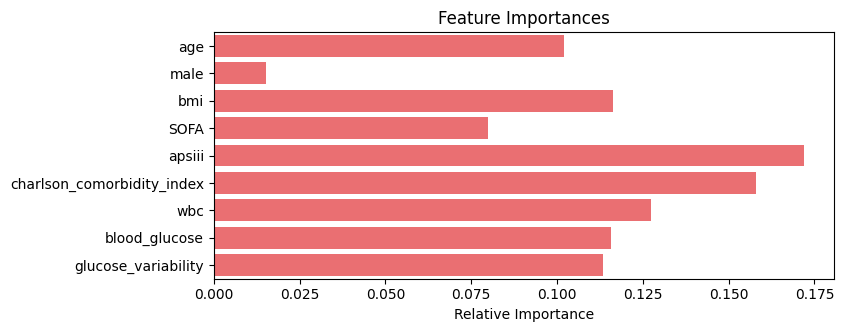

In [ ]:
# get RF feature importances
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)
rf_feature_importances = rf.feature_importances_
print(classification_report(y_test, rf.predict(X_test)))
# plot feature importances seaborn
plt.figure(figsize=(8, 3.2))
sns.barplot(x=rf_feature_importances, y=feature_cols, color='#FF5A5F')
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()